In [1]:
import pandas as pd
import numpy as np
!pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [61]:
df_cleaned = pd.read_csv('swiggy_cleaned_data.csv',dtype = {'is_weekend':'object'})
df_imputed = pd.read_csv('swiggy_imputed_data.csv',dtype = {'is_weekend':'object'})

In [62]:
df_cleaned.head()


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_year,order_day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,INDO,19,3,2022,Saturday,True,15.0,11.0,morning,3.025149
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,BANG,25,3,2022,Friday,False,5.0,19.0,night,20.183530
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,BANG,19,3,2022,Saturday,True,15.0,8.0,morning,1.552758
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,COIMB,5,4,2022,Tuesday,False,10.0,18.0,evening,7.790401
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,CHEN,26,3,2022,Saturday,True,15.0,13.0,afternoon,6.210138


In [4]:
df_imputed.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,INDO,19,3,Saturday,True,15.0,11.0,morning,3.03
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,BANG,25,3,Friday,False,5.0,19.0,night,20.18
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,BANG,19,3,Saturday,True,15.0,8.0,morning,1.55
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,COIMB,5,4,Tuesday,False,10.0,18.0,evening,7.79
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,CHEN,26,3,Saturday,True,15.0,13.0,afternoon,6.21


In [5]:
print(df_cleaned.info())
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43648 non-null  float64
 1   ratings              43594 non-null  float64
 2   weather              44977 non-null  object 
 3   traffic              44992 non-null  object 
 4   vehicle_condition    45502 non-null  int64  
 5   type_of_order        45502 non-null  object 
 6   type_of_vehicle      45502 non-null  object 
 7   multiple_deliveries  44509 non-null  float64
 8   festival             45274 non-null  object 
 9   city_type            44304 non-null  object 
 10  time_taken           45502 non-null  float64
 11  city_name            45502 non-null  object 
 12  day                  45502 non-null  int64  
 13  month                45502 non-null  int64  
 14  day_of_week          45502 non-null  object 
 15  is_weekend           45502 non-null 

In [6]:
print(df_cleaned.isnull().sum())
print(df_imputed.isnull().sum())

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
day                       0
month                     0
day_of_week               0
is_weekend                0
pickup_time            1640
order_time_hour        1640
order_time_of_day      1640
distance               3630
dtype: int64
age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
time_taken             0
city_name              0
day                    0
month                  0
day_of_week            0
is_weekend             0
pickup_time            0
or

In [52]:
df_cleaned.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'day', 'month', 'day_of_week',
       'is_weekend', 'pickup_time', 'order_time_hour', 'order_time_of_day',
       'distance'],
      dtype='object')

In [59]:
df_cleaned['multiple_deliveries'].median()

1.0

In [56]:
num_cols = [col for col in df_imputed.columns.to_list() if df_imputed[col].dtype != 'object']
num_cols

['age',
 'ratings',
 'vehicle_condition',
 'multiple_deliveries',
 'time_taken',
 'day',
 'month',
 'pickup_time',
 'order_time_hour',
 'distance']

In [49]:

num_cols = ["age","ratings","pickup_time","order_time_hour","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","city_name","order_month",
                    "order_day_of_week",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [50]:

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_of_day']

In [51]:
df_cleaned[features_to_fill_missing].isnull().sum()

KeyError: "['order_month', 'order_day_of_week'] not in index"

In [7]:
print(df_cleaned.shape)
print(df_imputed.shape)

(45502, 20)
(45502, 20)


In [8]:
print(df_cleaned.columns.to_list())
print(df_imputed.columns.to_list())

['age', 'ratings', 'weather', 'traffic', 'vehicle_condition', 'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival', 'city_type', 'time_taken', 'city_name', 'day', 'month', 'day_of_week', 'is_weekend', 'pickup_time', 'order_time_hour', 'order_time_of_day', 'distance']
['age', 'ratings', 'weather', 'traffic', 'vehicle_condition', 'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival', 'city_type', 'time_taken', 'city_name', 'day', 'month', 'day_of_week', 'is_weekend', 'pickup_time', 'order_time_hour', 'order_time_of_day', 'distance']


In [9]:
def plot_percentage_bar(dataframe, column_name):

    data = dataframe[column_name].value_counts(normalize=True) * 100

    # Plot
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=data.index, y=data.values, edgecolor='black')

    # Add labels on bars
    for container in ax.containers:
        labels = [f'{bar.get_height():.1f}%' for bar in container]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

    # Title and axis labels
    ax.set_title(f"Distribution of {column_name}", fontsize=14)
    ax.set_xlabel(f'{column_name}', fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)

    # Style
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


# Age

<Axes: xlabel='age', ylabel='Density'>

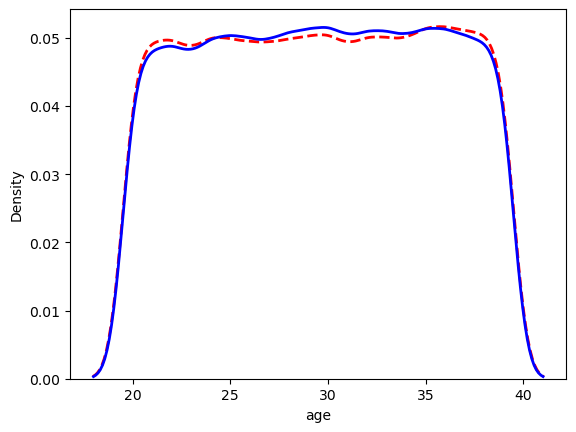

In [10]:
sns.kdeplot(df_cleaned['age'], label='Original (with NaNs)', color='red', linestyle='--', linewidth=2)
sns.kdeplot(df_imputed['age'], label='Imputed', color='blue', linewidth=2)


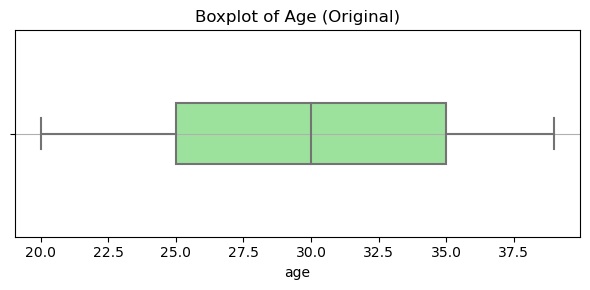

In [11]:

plt.figure(figsize=(6, 3))
sns.boxplot(x=df_cleaned['age'], color='lightgreen', width=0.3)

plt.title('Boxplot of Age (Original)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()


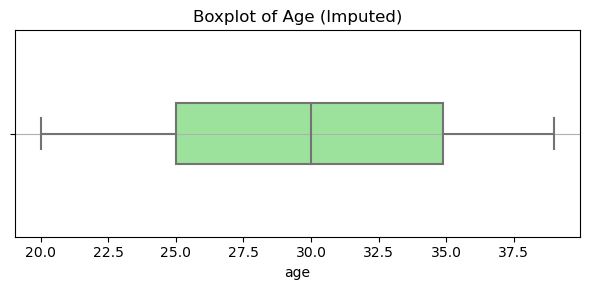

In [12]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_imputed['age'], color='lightgreen', width=0.3)

plt.title('Boxplot of Age (Imputed)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()

### Age column has no outliers

# Ratings

<Axes: xlabel='ratings', ylabel='Density'>

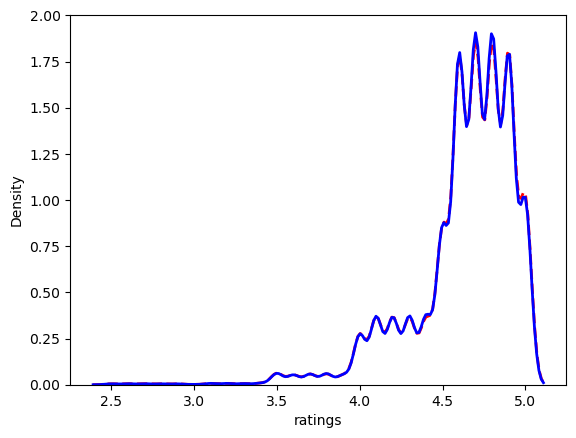

In [13]:
sns.kdeplot(df_cleaned['ratings'], label='Original (with NaNs)', color='red', linestyle='--', linewidth=2)
sns.kdeplot(df_imputed['ratings'], label='Imputed', color='blue', linewidth=2)

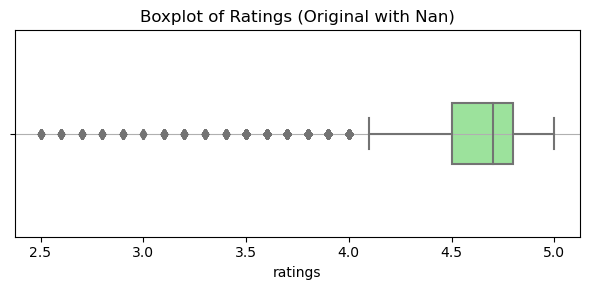

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_imputed['ratings'], color='lightgreen', width=0.3)

plt.title('Boxplot of Ratings (Original with Nan)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()

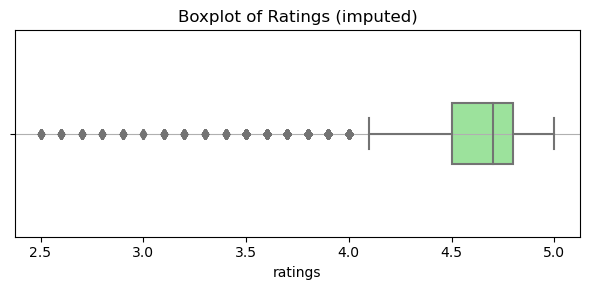

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_imputed['ratings'], color='lightgreen', width=0.3)

plt.title('Boxplot of Ratings (imputed)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
Q1 = df_cleaned['ratings'].quantile(0.25)
Q3 = df_cleaned['ratings'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
print(df_cleaned[(df_cleaned['ratings'] < lower_bound) | (df_cleaned['ratings'] > upper_bound)].shape)
df_cleaned[(df_cleaned['ratings'] < lower_bound) | (df_cleaned['ratings'] > upper_bound)].sample(5)

3.8999999999999995
5.500000000000001
(1132, 20)


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
4941,31.0,3.5,stormy,jam,2,buffet,scooter,1.0,no,metropolitian,44.0,BANG,6,3,Sunday,True,5.0,19.0,night,17.076448
664,20.0,3.5,sunny,jam,0,buffet,motorcycle,3.0,yes,semi-urban,50.0,VAD,28,3,Monday,False,15.0,21.0,night,4.544265
27291,34.0,3.0,sunny,low,0,snack,motorcycle,0.0,no,metropolitian,32.0,BANG,4,4,Monday,False,15.0,23.0,late_night,13.971969
24992,36.0,3.6,sandstorms,jam,1,buffet,motorcycle,1.0,no,metropolitian,43.0,SUR,6,3,Sunday,True,10.0,21.0,night,12.161131
33639,32.0,3.7,stormy,jam,2,drinks,electric_scooter,2.0,no,metropolitian,38.0,RANCHI,12,3,Saturday,True,15.0,19.0,night,NaN


In [17]:
df_cleaned[df_cleaned['ratings'] >= 5].sample(10)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
22392,30.0,5.0,sandstorms,medium,1,buffet,motorcycle,1.0,no,urban,24.0,HYD,6,4,Wednesday,False,15.0,18.0,evening,10.757536
9205,32.0,5.0,windy,low,1,drinks,motorcycle,0.0,no,metropolitian,29.0,RANCHI,3,4,Sunday,True,5.0,8.0,morning,1.509447
13859,29.0,5.0,fog,jam,2,buffet,electric_scooter,1.0,no,metropolitian,30.0,COIMB,25,3,Friday,False,5.0,21.0,night,10.906413
34490,39.0,5.0,sunny,low,1,drinks,motorcycle,1.0,no,metropolitian,19.0,COIMB,1,4,Friday,False,5.0,9.0,morning,3.116127
28728,39.0,5.0,sandstorms,jam,1,meal,scooter,0.0,no,urban,25.0,MUM,9,3,Wednesday,False,10.0,20.0,night,7.648280
25377,39.0,5.0,sandstorms,medium,0,drinks,motorcycle,1.0,no,metropolitian,40.0,PUNE,4,3,Friday,False,5.0,17.0,evening,12.257620
42279,27.0,5.0,sunny,jam,1,buffet,scooter,1.0,no,metropolitian,12.0,VAD,6,4,Wednesday,False,15.0,21.0,night,NaN
2972,23.0,5.0,windy,medium,0,buffet,motorcycle,1.0,no,urban,31.0,ALH,14,2,Monday,False,15.0,18.0,evening,11.983204
1570,21.0,5.0,sunny,medium,2,snack,motorcycle,0.0,no,urban,11.0,BANG,1,3,Tuesday,False,15.0,17.0,evening,7.763197
36839,22.0,5.0,windy,medium,0,buffet,motorcycle,1.0,no,metropolitian,31.0,MYS,25,3,Friday,False,15.0,18.0,evening,NaN


In [18]:
Q1 = df_imputed['ratings'].quantile(0.25)
Q3 = df_imputed['ratings'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
print(df_imputed[(df_imputed['ratings'] < lower_bound) | (df_imputed['ratings'] > upper_bound)].shape)
df_imputed[(df_imputed['ratings'] < lower_bound) | (df_imputed['ratings'] > upper_bound)].sample(5)

4.050000000000001
5.25
(2475, 20)


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
45470,27.0,4.0,fog,jam,2,meal,scooter,1.0,no,metropolitian,31.0,JAP,15,3,Tuesday,False,5.0,19.0,night,8.94
35529,30.0,3.6,stormy,medium,1,meal,motorcycle,0.0,no,metropolitian,35.0,MYS,25,3,Friday,False,5.0,17.0,evening,9.19
35255,38.0,3.7,sandstorms,jam,1,drinks,motorcycle,0.0,no,metropolitian,32.0,MUM,14,3,Monday,False,15.0,19.0,night,13.76
7763,37.0,3.6,sunny,jam,2,snack,motorcycle,0.0,no,metropolitian,32.0,SUR,6,3,Sunday,True,10.0,20.0,night,10.64
8483,22.0,4.0,fog,jam,1,meal,scooter,1.0,no,metropolitian,31.0,PUNE,20,3,Sunday,True,5.0,21.0,night,10.72


In [19]:
df_imputed[df_imputed['ratings'] >= 5].sample(10)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
19640,27.0,5.0,windy,jam,2,meal,scooter,1.0,no,metropolitian,26.0,MYS,27,3,Sunday,True,10.0,21.0,night,12.44
35449,36.0,5.0,fog,jam,0,meal,motorcycle,1.0,no,metropolitian,50.0,RANCHI,12,3,Saturday,True,15.0,20.0,night,13.58
21216,28.0,5.0,sunny,medium,2,meal,electric_scooter,1.0,no,metropolitian,17.0,KNP,11,2,Friday,False,5.0,17.0,evening,7.46
11117,36.0,5.0,cloudy,medium,0,drinks,motorcycle,1.0,no,urban,30.0,LUDH,17,2,Thursday,False,15.0,16.0,afternoon,5.86
3702,34.0,5.0,sandstorms,low,0,snack,motorcycle,1.0,no,metropolitian,27.0,PUNE,14,3,Monday,False,15.0,22.0,night,12.26
10044,37.0,5.0,stormy,jam,0,drinks,motorcycle,1.0,no,metropolitian,32.0,AURG,17,2,Thursday,False,10.0,22.0,night,4.58
616,25.0,5.0,cloudy,high,1,drinks,scooter,1.0,no,urban,32.0,BANG,17,3,Thursday,False,10.0,12.0,afternoon,1.55
38499,23.0,5.0,sunny,medium,0,buffet,motorcycle,0.0,no,metropolitian,15.0,PUNE,5,4,Tuesday,False,15.0,18.0,evening,4.60
40205,29.0,5.0,sunny,low,1,buffet,scooter,1.0,no,urban,25.0,RANCHI,14,3,Monday,False,15.0,23.0,late_night,16.60
30286,34.0,5.0,stormy,medium,1,meal,motorcycle,0.0,no,metropolitian,24.0,VAD,12,3,Saturday,True,10.0,18.0,evening,10.60


### In the Ratings column, the values below 4.05 are being flagged as outliers by the statistical method (IQR-based). However, these values are not incorrect or messy—they are valid real-world ratings.

# Weather

In [20]:
df_cleaned['weather'].value_counts()

fog           7654
stormy        7586
cloudy        7536
sandstorms    7495
windy         7422
sunny         7284
Name: weather, dtype: int64

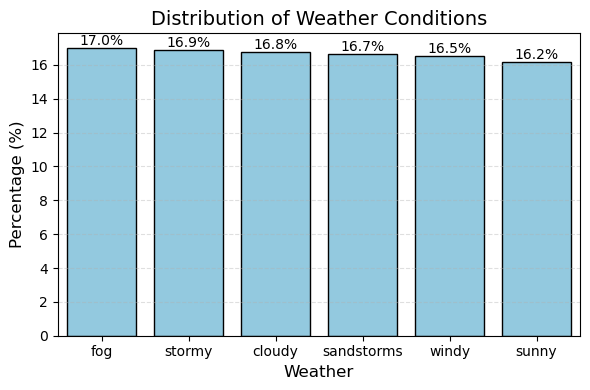

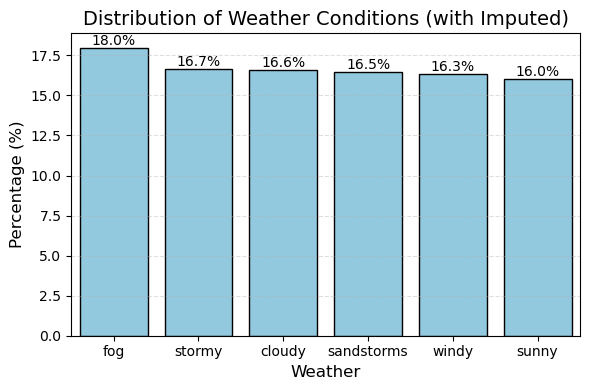

In [21]:

data = df_cleaned['weather'].value_counts(normalize=True)* 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

ax.set_title("Distribution of Weather Conditions", fontsize=14)
ax.set_xlabel("Weather", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


data = df_imputed['weather'].value_counts(normalize=True)* 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

ax.set_title("Distribution of Weather Conditions (with Imputed)", fontsize=14)
ax.set_xlabel("Weather", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Traffic

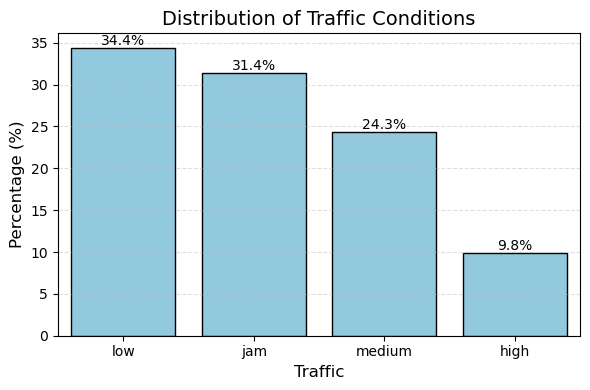

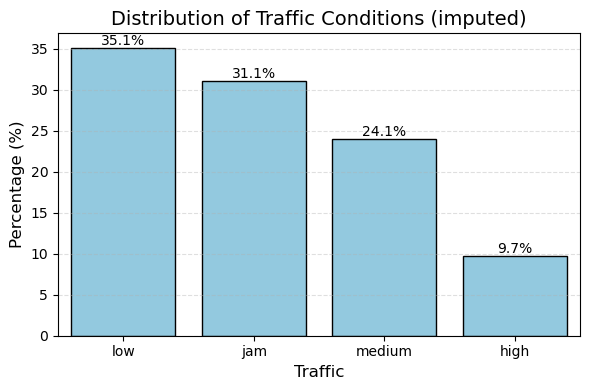

In [22]:
data = df_cleaned['traffic'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected axis labels and title
ax.set_title("Distribution of Traffic Conditions", fontsize=14)
ax.set_xlabel("Traffic", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



data = df_imputed['traffic'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected axis labels and title
ax.set_title("Distribution of Traffic Conditions (imputed)", fontsize=14)
ax.set_xlabel("Traffic", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Vehicle Conditions

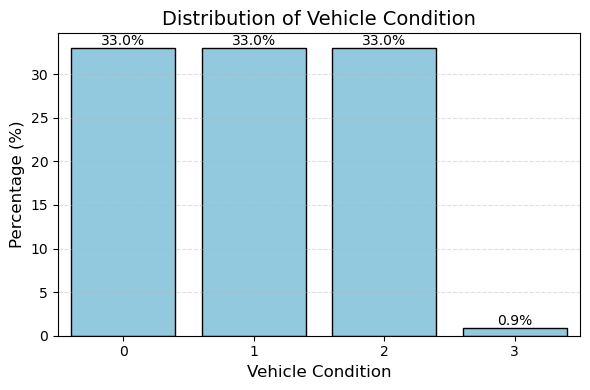

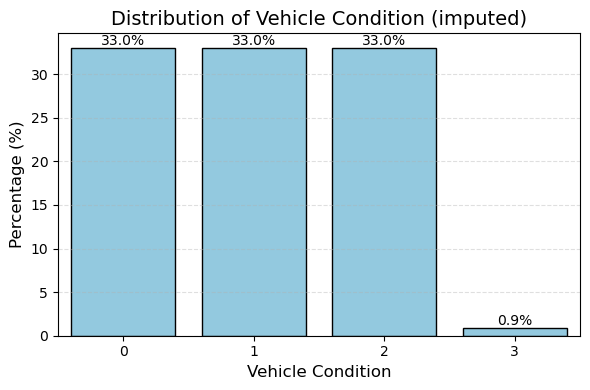

In [23]:
data = df_cleaned['vehicle_condition'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

ax.set_title("Distribution of Vehicle Condition", fontsize=14)
ax.set_xlabel("Vehicle Condition", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


data = df_imputed['vehicle_condition'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

ax.set_title("Distribution of Vehicle Condition (imputed)", fontsize=14)
ax.set_xlabel("Vehicle Condition", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Most riders' vehicles are classified into three main condition levels — 0, 1, and 2 — and all of them appear almost equally in the data. But there's a very small number of vehicles marked with condition ‘3’, which seems unusual. This could either be a rare case or a possible mistake. 

In [24]:
df_imputed['vehicle_condition'].value_counts()

2    15034
1    15030
0    15009
3      429
Name: vehicle_condition, dtype: int64

In [64]:
df_cleaned[df_cleaned['vehicle_condition'] == 3]

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_year,order_day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance


We notice that for vehicle condition = 3, all the important fields like age, ratings, pickup_time, order_time_hour, and order_time are missing. This suggests that the entries marked with vehicle condition ‘3’ are likely messy or invalid data, rather than genuine observations. It would be wise to either investigate further or consider removing these rows from the dataset before using it for analysis or modeling.

In [26]:
df_imputed[df_imputed['vehicle_condition'] == 3]

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
120,33.3,4.6,fog,low,3,snack,electric_scooter,0.0,no,metropolitian,25.0,VAD,2,4,Saturday,True,11.6,21.33,night,16.66
250,32.1,4.1,fog,low,3,buffet,motorcycle,1.0,yes,urban,43.0,PUNE,8,3,Tuesday,False,6.3,19.84,night,16.85
348,29.1,4.7,fog,low,3,drinks,scooter,1.0,no,metropolitian,26.0,BANG,2,3,Wednesday,False,8.3,20.97,night,20.18
425,28.5,4.7,fog,low,3,snack,scooter,1.0,no,metropolitian,20.0,DEH,18,2,Friday,False,9.0,19.50,night,19.09
499,26.9,4.7,fog,low,3,drinks,scooter,0.0,no,metropolitian,24.0,BANG,1,3,Tuesday,False,11.5,22.12,night,9.32
534,34.4,4.8,fog,low,3,buffet,scooter,1.0,no,metropolitian,16.0,MYS,3,3,Thursday,False,10.0,21.34,night,9.33
596,28.2,4.6,fog,low,3,snack,scooter,0.0,no,metropolitian,29.0,RANCHI,27,3,Sunday,True,13.6,21.12,night,16.60
610,31.3,4.6,fog,low,3,meal,electric_scooter,0.0,no,metropolitian,27.0,RANCHI,1,3,Tuesday,False,8.3,17.00,night,1.53
762,30.6,4.6,fog,low,3,meal,motorcycle,1.0,no,metropolitian,15.0,RANCHI,8,3,Tuesday,False,6.7,20.35,night,13.58
973,29.2,4.8,fog,low,3,snack,scooter,1.0,no,metropolitian,14.0,BANG,10,3,Thursday,False,8.2,14.08,night,13.97


In [27]:
df_cleaned.drop(index=df_cleaned[df_cleaned['vehicle_condition'] == 3].index, inplace=True)
df_imputed.drop(index=df_imputed[df_imputed['vehicle_condition'] == 3].index, inplace=True)

In [28]:
print(df_cleaned.shape)
print(df_imputed.shape)

(45073, 20)
(45073, 20)


# Type_of_order

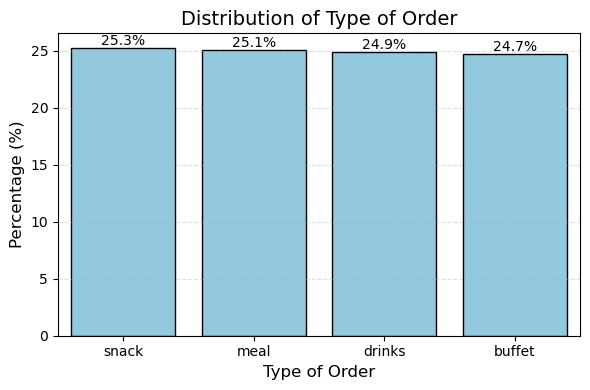

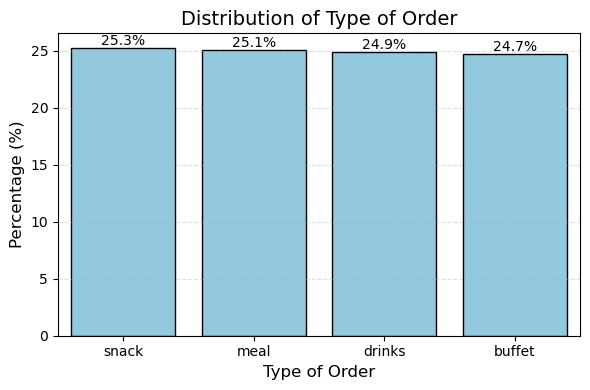

In [29]:
data = df_cleaned['type_of_order'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected title and axis labels
ax.set_title("Distribution of Type of Order", fontsize=14)
ax.set_xlabel("Type of Order", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



data = df_imputed['type_of_order'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected title and axis labels
ax.set_title("Distribution of Type of Order", fontsize=14)
ax.set_xlabel("Type of Order", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Type_of_vehicle

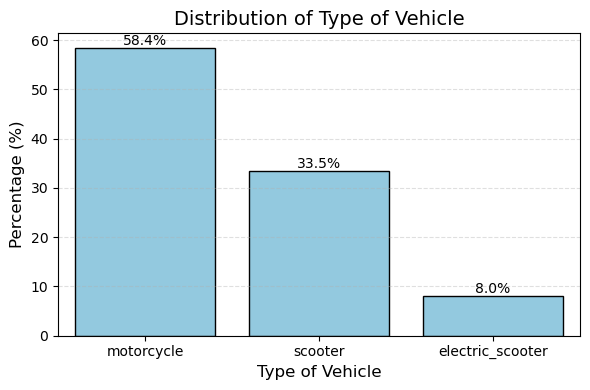

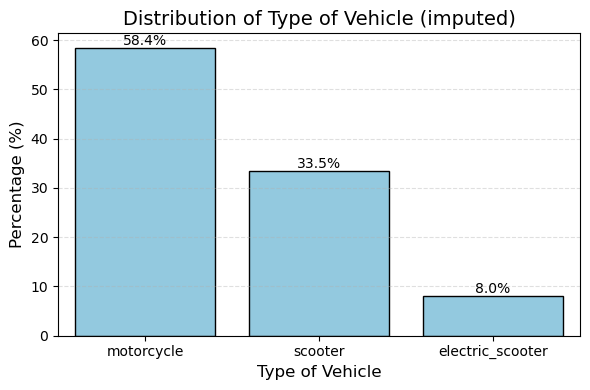

In [30]:
data = df_cleaned['type_of_vehicle'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected title and axis labels
ax.set_title("Distribution of Type of Vehicle", fontsize=14)
ax.set_xlabel("Type of Vehicle", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


data = df_imputed['type_of_vehicle'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected title and axis labels
ax.set_title("Distribution of Type of Vehicle (imputed)", fontsize=14)
ax.set_xlabel("Type of Vehicle", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# Multiple_deliveries

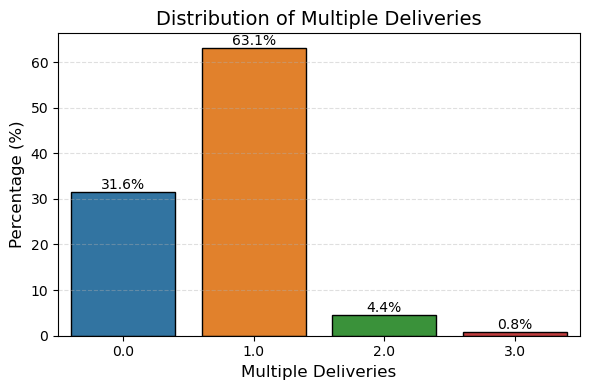

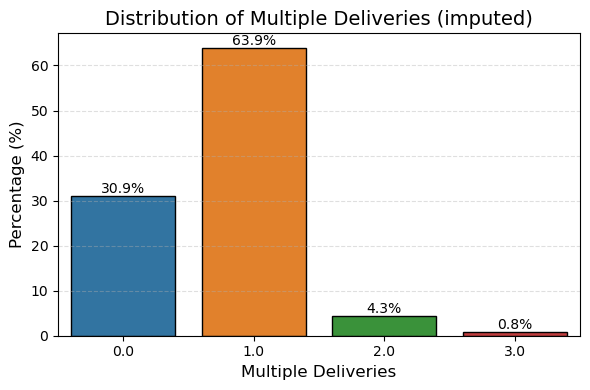

In [31]:
data = df_cleaned['multiple_deliveries'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values, edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Corrected title and axis labels
ax.set_title("Distribution of Multiple Deliveries", fontsize=14)
ax.set_xlabel("Multiple Deliveries", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


data = df_imputed['multiple_deliveries'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=data.index, y=data.values,edgecolor='black')

# Add percentage labels on top of each bar
for container in ax.containers:
    labels = [f'{bar.get_height():.1f}%' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# ✅ Corrected title and axis labels
ax.set_title("Distribution of Multiple Deliveries (imputed)", fontsize=14)
ax.set_xlabel("Multiple Deliveries", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



In [32]:
df_cleaned[df_cleaned['multiple_deliveries'] == 3]

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
9,36.0,4.2,fog,jam,2,snack,motorcycle,3.0,no,metropolitian,46.0,DEH,12,2,Saturday,True,15.0,21.0,night,10.280582
43,37.0,4.7,sandstorms,jam,0,snack,motorcycle,3.0,no,metropolitian,52.0,SUR,4,4,Monday,False,5.0,19.0,night,13.682516
159,36.0,4.0,sunny,jam,0,meal,motorcycle,3.0,no,metropolitian,44.0,VAD,16,3,Wednesday,False,5.0,20.0,night,13.631344
165,35.0,4.8,fog,medium,0,meal,motorcycle,3.0,no,metropolitian,48.0,HYD,4,3,Friday,False,10.0,17.0,evening,13.829314
182,35.0,4.9,fog,jam,0,drinks,motorcycle,3.0,no,metropolitian,43.0,MYS,2,3,Wednesday,False,5.0,21.0,night,10.880652
267,32.0,4.4,sandstorms,jam,0,drinks,motorcycle,3.0,no,metropolitian,42.0,KOC,12,2,Saturday,True,10.0,21.0,night,17.164834
275,34.0,4.9,sandstorms,jam,0,buffet,motorcycle,3.0,yes,urban,50.0,CHEN,23,3,Wednesday,False,15.0,21.0,night,17.075594
371,31.0,4.0,windy,medium,0,drinks,motorcycle,3.0,yes,metropolitian,45.0,KOL,14,2,Monday,False,10.0,17.0,evening,13.620357
374,38.0,4.8,sandstorms,jam,0,meal,motorcycle,3.0,no,metropolitian,44.0,COIMB,28,3,Monday,False,15.0,21.0,night,9.348326
413,32.0,4.0,windy,medium,0,buffet,motorcycle,3.0,yes,urban,49.0,BANG,23,3,Wednesday,False,5.0,18.0,evening,10.867366


In [33]:
df_cleaned['multiple_deliveries'].value_counts()

1.0    27837
0.0    13937
2.0     1960
3.0      355
Name: multiple_deliveries, dtype: int64

In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45073 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43648 non-null  float64
 1   ratings              43594 non-null  float64
 2   weather              44977 non-null  object 
 3   traffic              44992 non-null  object 
 4   vehicle_condition    45073 non-null  int64  
 5   type_of_order        45073 non-null  object 
 6   type_of_vehicle      45073 non-null  object 
 7   multiple_deliveries  44089 non-null  float64
 8   festival             44848 non-null  object 
 9   city_type            43893 non-null  object 
 10  time_taken           45073 non-null  float64
 11  city_name            45073 non-null  object 
 12  day                  45073 non-null  int64  
 13  month                45073 non-null  int64  
 14  day_of_week          45073 non-null  object 
 15  is_weekend           45073 non-null 

# Festival

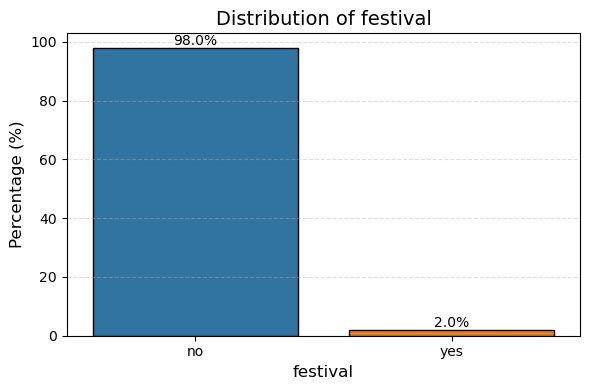

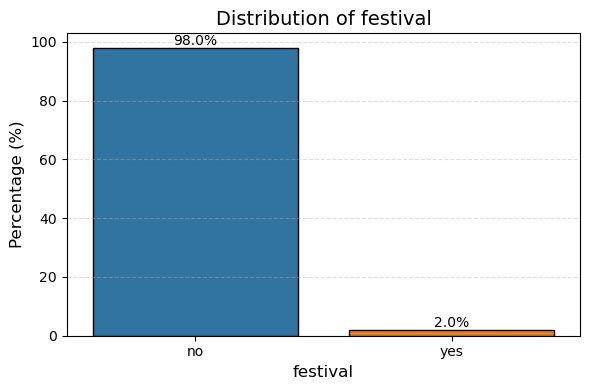

In [35]:
plot_percentage_bar(df_cleaned, 'festival')
plot_percentage_bar(df_imputed, 'festival')

# City_type

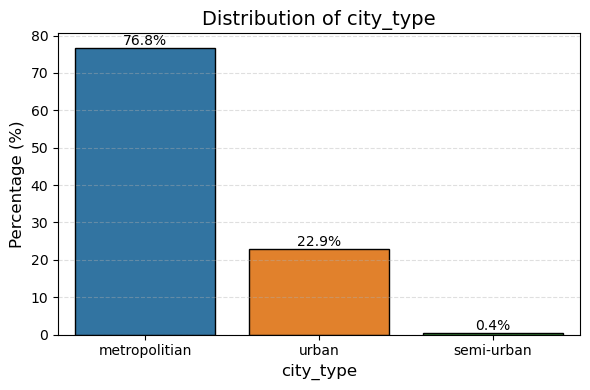

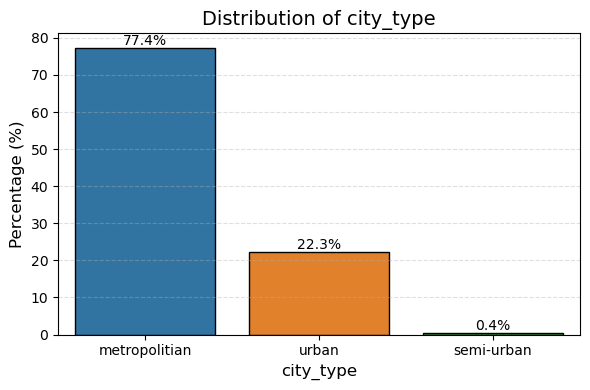

In [36]:
plot_percentage_bar(df_cleaned, 'city_type')
plot_percentage_bar(df_imputed, 'city_type')

In [37]:
df_cleaned[df_cleaned['city_type'] == 'semi-urban']

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
57,39.0,4.2,fog,jam,2,snack,scooter,1.0,no,semi-urban,49.0,VAD,2,3,Wednesday,False,15.0,20.0,night,NaN
188,38.0,4.3,sandstorms,jam,0,meal,motorcycle,1.0,yes,semi-urban,54.0,MYS,4,4,Monday,False,10.0,21.0,night,13.989917
664,20.0,3.5,sunny,jam,0,buffet,motorcycle,3.0,yes,semi-urban,50.0,VAD,28,3,Monday,False,15.0,21.0,night,4.544265
1683,36.0,5.0,windy,high,0,buffet,motorcycle,1.0,yes,semi-urban,49.0,PUNE,1,4,Friday,False,5.0,12.0,afternoon,6.128874
1712,31.0,4.6,sandstorms,jam,0,snack,motorcycle,1.0,no,semi-urban,52.0,PUNE,4,3,Friday,False,10.0,20.0,night,16.852689
1762,28.0,4.3,sunny,jam,0,meal,motorcycle,3.0,no,semi-urban,50.0,COIMB,1,3,Tuesday,False,5.0,20.0,night,7.790161
2416,39.0,4.9,windy,jam,0,snack,motorcycle,0.0,yes,semi-urban,50.0,BHP,12,2,Saturday,True,15.0,19.0,night,NaN
2442,36.0,4.8,sandstorms,jam,0,drinks,motorcycle,1.0,no,semi-urban,53.0,JAP,27,3,Sunday,True,10.0,21.0,night,20.851579
2881,31.0,5.0,cloudy,medium,0,meal,motorcycle,3.0,no,semi-urban,46.0,RANCHI,27,3,Sunday,True,15.0,18.0,evening,19.618969
3075,36.0,4.4,sandstorms,jam,0,snack,motorcycle,0.0,no,semi-urban,48.0,VAD,19,3,Saturday,True,5.0,19.0,night,4.544231


In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45073 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43648 non-null  float64
 1   ratings              43594 non-null  float64
 2   weather              44977 non-null  object 
 3   traffic              44992 non-null  object 
 4   vehicle_condition    45073 non-null  int64  
 5   type_of_order        45073 non-null  object 
 6   type_of_vehicle      45073 non-null  object 
 7   multiple_deliveries  44089 non-null  float64
 8   festival             44848 non-null  object 
 9   city_type            43893 non-null  object 
 10  time_taken           45073 non-null  float64
 11  city_name            45073 non-null  object 
 12  day                  45073 non-null  int64  
 13  month                45073 non-null  int64  
 14  day_of_week          45073 non-null  object 
 15  is_weekend           45073 non-null 

# Time_taken

<Axes: xlabel='time_taken', ylabel='Density'>

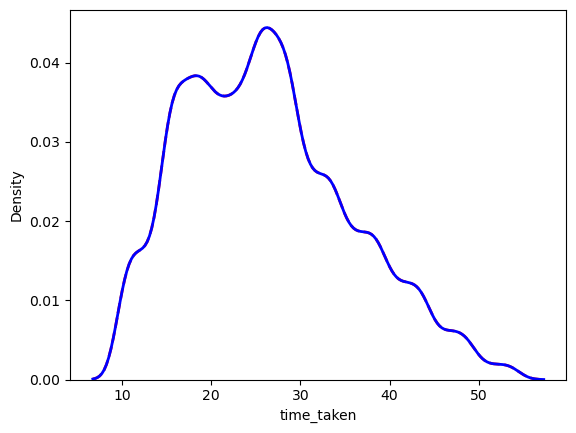

In [39]:
sns.kdeplot(df_cleaned['time_taken'], label='Original (with NaNs)', color='red', linestyle='--', linewidth=2)
sns.kdeplot(df_imputed['time_taken'], label='Imputed', color='blue', linewidth=2)

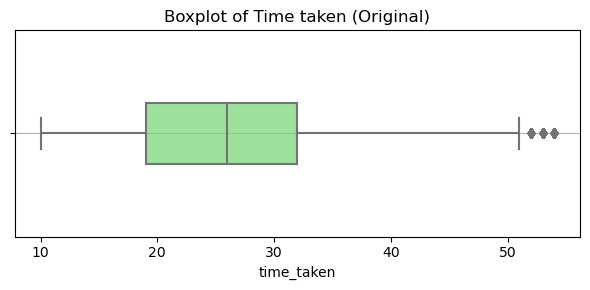

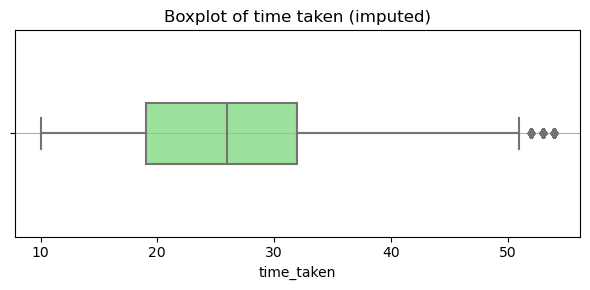

In [40]:

plt.figure(figsize=(6, 3))
sns.boxplot(x=df_cleaned['time_taken'], color='lightgreen', width=0.3)

plt.title('Boxplot of Time taken (Original)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 3))
sns.boxplot(x=df_imputed['time_taken'], color='lightgreen', width=0.3)

plt.title('Boxplot of time taken (imputed)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
Q1 = df_cleaned['time_taken'].quantile(0.25)
Q3 = df_cleaned['time_taken'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
print(df_cleaned[(df_cleaned['time_taken'] < lower_bound) | (df_cleaned['time_taken'] > upper_bound)].shape)
df_cleaned[(df_cleaned['time_taken'] < lower_bound) | (df_cleaned['time_taken'] > upper_bound)].sample(5)

-0.5
51.5
(265, 20)


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance
39260,26.0,3.9,sunny,jam,0,buffet,motorcycle,1.0,no,metropolitian,53.0,MYS,26,3,Saturday,True,15.0,21.0,night,7.772619
22505,31.0,4.2,windy,jam,0,buffet,motorcycle,1.0,no,semi-urban,52.0,COIMB,6,3,Sunday,True,10.0,21.0,night,20.253687
2373,31.0,4.9,fog,jam,0,snack,motorcycle,0.0,no,metropolitian,54.0,CHEN,6,4,Wednesday,False,5.0,21.0,night,17.074786
27209,36.0,4.9,windy,jam,0,meal,motorcycle,3.0,no,metropolitian,52.0,LUDH,14,2,Monday,False,10.0,20.0,night,13.184663
36373,34.0,4.8,cloudy,jam,0,buffet,motorcycle,0.0,yes,metropolitian,53.0,ALH,16,2,Wednesday,False,5.0,21.0,night,11.983574


In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45073 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43648 non-null  float64
 1   ratings              43594 non-null  float64
 2   weather              44977 non-null  object 
 3   traffic              44992 non-null  object 
 4   vehicle_condition    45073 non-null  int64  
 5   type_of_order        45073 non-null  object 
 6   type_of_vehicle      45073 non-null  object 
 7   multiple_deliveries  44089 non-null  float64
 8   festival             44848 non-null  object 
 9   city_type            43893 non-null  object 
 10  time_taken           45073 non-null  float64
 11  city_name            45073 non-null  object 
 12  day                  45073 non-null  int64  
 13  month                45073 non-null  int64  
 14  day_of_week          45073 non-null  object 
 15  is_weekend           45073 non-null 

# Pickup_time , order_time_hour , distance

<Axes: xlabel='pickup_time', ylabel='Density'>

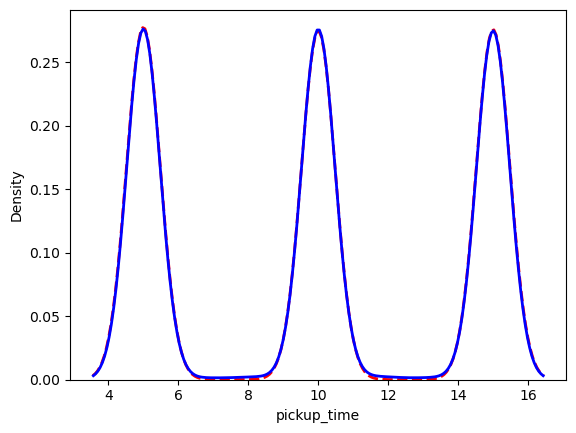

In [43]:
sns.kdeplot(df_cleaned['pickup_time'], label='Original (with NaNs)', color='red', linestyle='--', linewidth=2)
sns.kdeplot(df_imputed['pickup_time'], label='Imputed', color='blue', linewidth=2)

<Axes: xlabel='order_time_hour', ylabel='Density'>

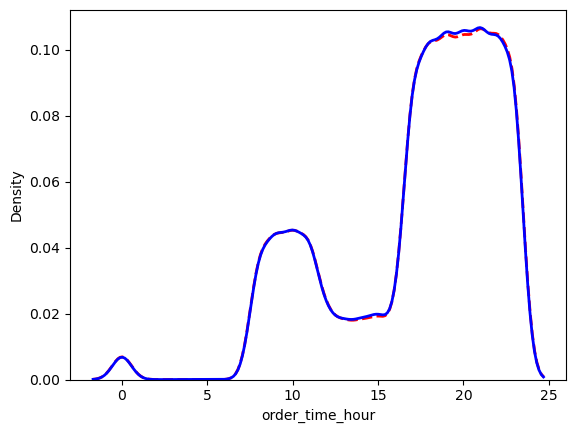

In [44]:
sns.kdeplot(df_cleaned['order_time_hour'], label='Original (with NaNs)', color='red', linestyle='--', linewidth=2)
sns.kdeplot(df_imputed['order_time_hour'], label='Imputed', color='blue', linewidth=2)

<Axes: xlabel='distance', ylabel='Density'>

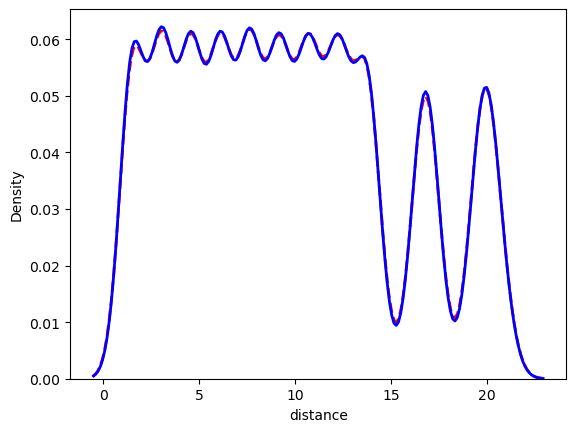

In [45]:
sns.kdeplot(df_cleaned['distance'], label='Original (with NaNs)', color='red', linestyle='--', linewidth=2)
sns.kdeplot(df_imputed['distance'], label='Imputed', color='blue', linewidth=2)

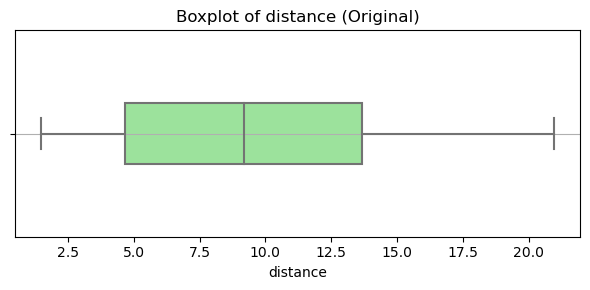

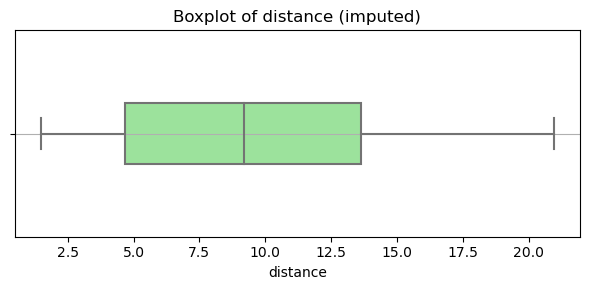

-8.877242773540182
27.215817788060768
(0, 20)


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance


In [46]:

plt.figure(figsize=(6, 3))
sns.boxplot(x=df_cleaned['distance'], color='lightgreen', width=0.3)

plt.title('Boxplot of distance (Original)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 3))
sns.boxplot(x=df_imputed['distance'], color='lightgreen', width=0.3)

plt.title('Boxplot of distance (imputed)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()


Q1 = df_cleaned['distance'].quantile(0.25)
Q3 = df_cleaned['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
print(df_cleaned[(df_cleaned['distance'] < lower_bound) | (df_cleaned['distance'] > upper_bound)].shape)
df_cleaned[(df_cleaned['distance'] < lower_bound) | (df_cleaned['distance'] > upper_bound)]

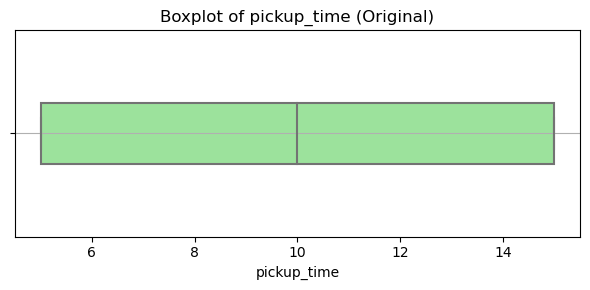

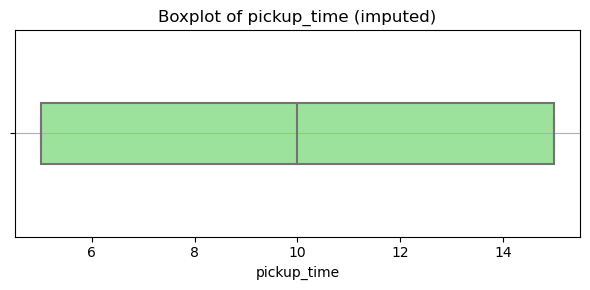

-10.0
30.0
(0, 20)


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,day,month,day_of_week,is_weekend,pickup_time,order_time_hour,order_time_of_day,distance


In [47]:

plt.figure(figsize=(6, 3))
sns.boxplot(x=df_cleaned['pickup_time'], color='lightgreen', width=0.3)

plt.title('Boxplot of pickup_time (Original)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 3))
sns.boxplot(x=df_imputed['pickup_time'], color='lightgreen', width=0.3)

plt.title('Boxplot of pickup_time (imputed)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()


Q1 = df_cleaned['pickup_time'].quantile(0.25)
Q3 = df_cleaned['pickup_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
print(df_cleaned[(df_cleaned['pickup_time'] < lower_bound) | (df_cleaned['pickup_time'] > upper_bound)].shape)
df_cleaned[(df_cleaned['pickup_time'] < lower_bound) | (df_cleaned['pickup_time'] > upper_bound)]